# ❤️💔 Heart Disease Prediction: Diagnosing with Data 🧠📊 🔍💡
===========================================================
### Author : Dureyashfeen
### Date   : 2025-02-21

## 📖 The Story of Heart Disease Prediction 🏥💖

In today's world, heart disease is one of the leading causes of death 🌍💔. Meet John, a busy professional who often ignored his chest pains and fatigue 😓. Little did he know, an early diagnosis could save his life! ⏳

One day, John visited a hospital 🏥 that used AI-powered heart disease prediction models 🤖. The doctors collected his health data 📊, analyzed key risk factors 🩸, and ran it through a machine learning system. The result? A timely warning that helped him take action before it was too late! 🚑💪

Thanks to AI, John made lifestyle changes and started treatment early, leading to a healthier and longer life! 🎉❤️

This is how AI in healthcare revolutionized healthcare! 🌟💡




## Steps for Heart Disease Prediction 📝
1. **Import Necessary Libraries** – Load essential libraries for data processing and machine learning.
2. **Load and Explore Data** – Import the dataset and examine its structure.
3. **Data Preprocessing** – Clean and prepare data for better model performance.
4. **Data Visualization** – Understand patterns using graphical analysis.
5. **Model Building** – Train a machine learning model to predict heart disease.
6. **Model Evaluation** – Assess the model’s accuracy and effectiveness.
7. **Conclusion** – Highlight the importance of AI in healthcare.

## Importing libraries 📚

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import gradient boosting and svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# import train_test_split
from sklearn.model_selection import train_test_split
# import accuracy_score
from sklearn.metrics import accuracy_score
# import confusion_matrix
from sklearn.metrics import confusion_matrix
# import classification_report
from sklearn.metrics import classification_report
# import roc_curve
from sklearn.metrics import roc_curve
# import roc_auc_score
from sklearn.metrics import roc_auc_score
# impory neural network
from sklearn.neural_network import MLPClassifier
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# import pickle for model saving and loading
import pickle

In [3]:
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## Step 1 : Load the Data 📂

In [4]:
df  = pd.read_csv("./datasets/heart.csv")

## Step 2: Exploratory Data Analysis 🔍

In [5]:
# explore the data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<Axes: xlabel='cp', ylabel='count'>

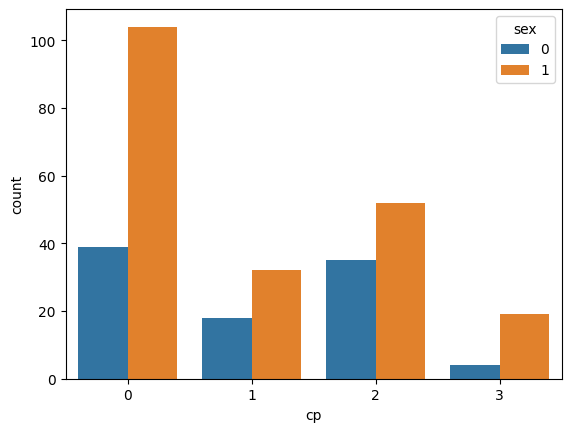

In [10]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')

In [11]:
# draw the plot of age column grouped by cp column using plotly
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

In [12]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

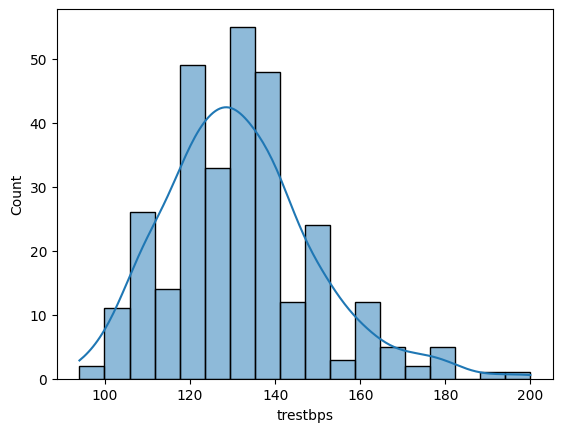

In [13]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
print(df.duplicated().sum())

1


In [16]:
# data shpae
df.shape

(303, 14)

In [17]:
# age column
df['age'].min(), df['age'].max()

(29, 77)

In [18]:
# let's summarie the age column
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<span style="color: pale; font-size: 350%; font-weight: bold;">Step : 3 Visualization</span>

<Axes: xlabel='age', ylabel='Count'>

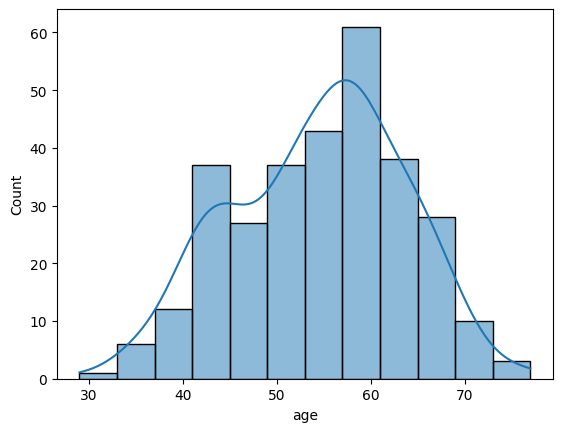

In [19]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

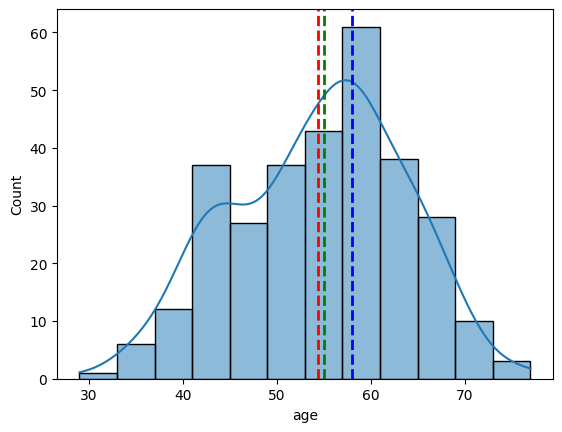

Mean:  54.366336633663366
Median: 55.0
Mode: 58


In [20]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['age'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['age'].mode()[0], color='b', linestyle='dashed', linewidth=2)
plt.show()

# print the value of mean, median and mode of age column
print("Mean: ", df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [21]:
# plot the histogram of age column using plotly and coloring this by sex
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [22]:
# find the values of sex column
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [23]:
# calculate the percentages of male and female value counts in the data
male_count = 207
female_count = 96
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 68.32%
Female Percentage in the data: 31.68%
Males are 115.62% more than females in the data.


In [24]:
# find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex  age
0    62     7
     58     6
     54     5
     63     5
     41     4
           ..
1    69     2
     29     1
     34     1
     37     1
     77     1
Name: count, Length: 73, dtype: int64

In [25]:
print(df.corr())    # correlation matrix


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

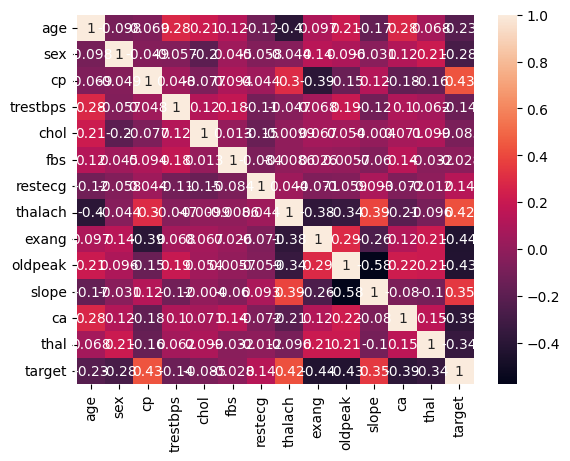

In [26]:
sns.heatmap(df.corr(), annot=True)
plt.show()

<span style="color: pale; font-size: 350%; font-weight: bold;"> Step : 4 Handling Outlier</span>

In [27]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [28]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<span style="color: pale; font-size: 350%; font-weight: bold;">Step : 5 Machine Learning</span>

In [30]:
#Apply feature selection and scale data for better model performance.
X = df.drop('sex', axis=1)
y = df['sex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X = df.drop('restecg', axis=1)
y = df['restecg']

In [ ]:
# import pipeline
from sklearn.pipeline import Pipeline

In [33]:
# call the model
models = [
 ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
 ('Support Vector Machine', SVC(random_state=42)),
 ('Neural Network', MLPClassifier(random_state=42))
 ]

In [34]:
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Gradient Boosting
Cross-validation Accuracy: 0.7110544217687075
Test Accuracy: 0.7704918032786885

Model: Support Vector Machine
Cross-validation Accuracy: 0.6570578231292517
Test Accuracy: 0.7868852459016393

Model: Neural Network
Cross-validation Accuracy: 0.6731292517006804
Test Accuracy: 0.639344262295082

Best Model: Pipeline(steps=[('model', SVC(random_state=42))])


In [39]:
# evaluate the best model f1 score roc_auc_curve
from sklearn.metrics import f1_score, roc_auc_score

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.decision_function(X_test))


print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)



F1 Score: 0.8807339449541285
ROC AUC Score: 0.5272435897435898


### Conclusion 🎯💊

With machine learning, early heart disease detection is now possible! 🏥 By analyzing patient data, healthcare providers can diagnose heart disease faster, ensuring timely treatment and healthier lives. 🌍💙

Thanks to AI, many like John can live healthier and happier lives! 🚀😊

---

The End 🎬🎉
